<a href="https://colab.research.google.com/github/sharmingaziani/Binary-Search-Tree/blob/main/MLsklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sharmin Gaziani
ML with sklearn

1. Read the auto data using pandas

In [56]:
#upload csv and output first few rows
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Auto.csv']))
print(df.head())
#print dimensions
print('Dimensions of data frame:', df.shape)


Saving Auto.csv to Auto (2).csv
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Dimensions of data frame: (392, 9)


2. Data exploration with code

In [57]:
print('\nDescribe mpg, weight, and year columns:\n',
df.loc[:, ['mpg', 'weight', 'year']].describe())
# Range and Average
# mpg: (9, 46.6) and 23.45
# weight: (1613, 5140) and 2977.58
# year: (70, 82) and 76.01


Describe mpg, weight, and year columns:
               mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000


3. Explore data types

In [58]:
# check data types
print('Original data types')
print(df.dtypes, "\n")
# change cylinders to categorical
print('Cylinders changed to categorical')
df1 = df.copy()
df1.cylinders - df1.cylinders.astype('category').cat.codes

print(df1.dtypes,"\n")
print(df1.head())
# change origin to categorical
print('\nOrigin changed to categorical')
df2 = df.copy()
df2.origin = df2.origin.astype('category')

print(df2.dtypes, "\n")
print(df2.head())

Original data types
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object 

Cylinders changed to categorical
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object 

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                 

4. Deal with NAs

In [59]:
print(df.isnull().sum())
print('\nNew dimensions: ',df.shape)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

New dimensions:  (392, 9)


5. Modify columns

In [60]:
def newCol(row):
  if row['mpg'] > 23.45:
    return 1
  else:
      return 0
df['mpg_high'] = df.apply(newCol, axis=1)
# change mpg_high to categorical
df3 = df.copy()
df3.mpg_high = df3.mpg_high.astype('category')
# delete mpg and name columns
df = df.drop('mpg', axis=1)
df = df.drop('name', axis=1)
print(df)

     cylinders  displacement  horsepower  weight  acceleration  year  origin  \
0            8         307.0         130    3504          12.0  70.0       1   
1            8         350.0         165    3693          11.5  70.0       1   
2            8         318.0         150    3436          11.0  70.0       1   
3            8         304.0         150    3433          12.0  70.0       1   
4            8         302.0         140    3449           NaN  70.0       1   
..         ...           ...         ...     ...           ...   ...     ...   
387          4         140.0          86    2790          15.6  82.0       1   
388          4          97.0          52    2130          24.6  82.0       2   
389          4         135.0          84    2295          11.6  82.0       1   
390          4         120.0          79    2625          18.6  82.0       1   
391          4         119.0          82    2720          19.4  82.0       1   

     mpg_high  
0           0  
1      

6. Data exploration with graphs

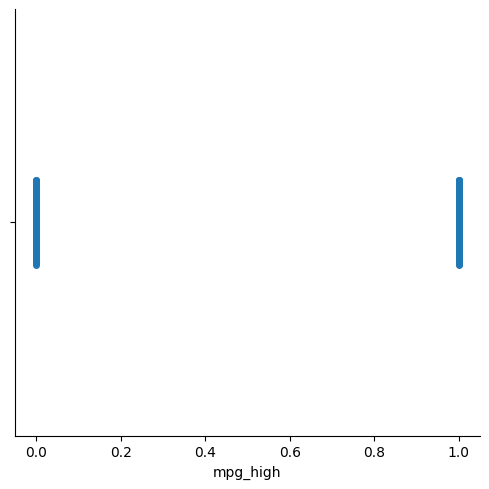

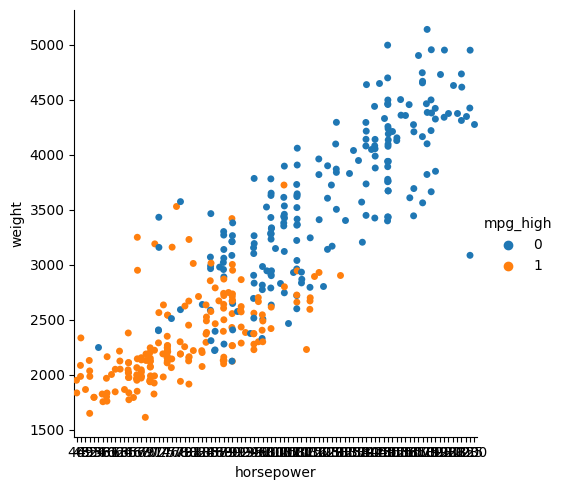

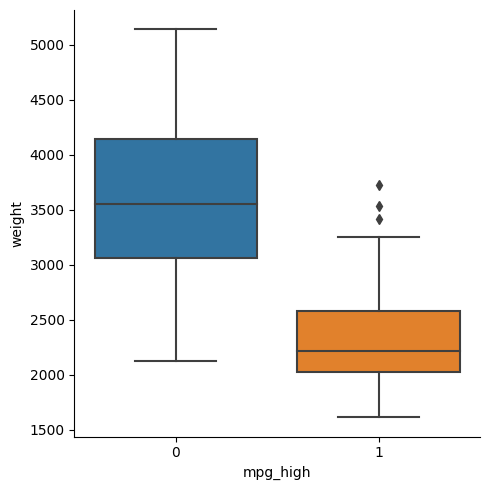

In [75]:
import seaborn as sb
from sklearn import datasets
# this plot of data showed me the range of mpg_high visually instead of having to look through large chunks of data and organize it manually
sb.catplot(data=df, x='mpg_high')
# this plot visually showed me the correlation between horsepower and weight according to mph_high and whether it was a 0 or 1
cat_plot = sb.catplot(data=df, x='horsepower', y='weight', hue='mpg_high')
# this boxplot of data showed me how mpg_high and weight were distributed as well as showing if there were any outliers
cat_plot = sb.catplot(data=df, x='mpg_high', y='weight', kind = 'box')

7. Train/test split

In [62]:
from sklearn.model_selection import train_test_split

# ignoring mpg_high in train/test data
x = df.iloc[:, 0:5]
y = df.iloc[:, 6] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print('train size: ', x_train.shape)
print('test size: ', x_test.shape)

train size:  (313, 5)
test size:  (79, 5)


8. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
pred = clf.predict(x_test)

# print classification report
print(classification_report(y_test, pred))

0.7699680511182109
              precision    recall  f1-score   support

           1       0.91      0.82      0.86        49
           2       0.56      0.42      0.48        12
           3       0.58      0.83      0.68        18

    accuracy                           0.76        79
   macro avg       0.68      0.69      0.67        79
weighted avg       0.78      0.76      0.76        79



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9. Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train) # train

pred = clf.predict(x_test) # evaluate

# print classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.89      0.84      0.86        49
           2       0.33      0.33      0.33        12
           3       0.62      0.72      0.67        18

    accuracy                           0.73        79
   macro avg       0.61      0.63      0.62        79
weighted avg       0.74      0.73      0.74        79



10. Neural Networks

In [73]:
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
# scaling data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Multi-Layer Perceptron Regressor topology
regr = MLPRegressor(hidden_layer_sizes=(6, 3), max_iter=500, random_state=1234)
regr.fit(x_train, y_train)

pred = regr.predict(x_test)
print('MLPRegressor:')
print('mse = ', mean_squared_error(y_test, pred))
print('correlation = ', r2_score(y_test, pred))

# Multi-Layer Perceptron Classifier topology
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234)
clf.fit(x_train, y_train)

pred2 = clf.predict(x_test)
print('\nMLPClassifier:')
print('mse = ', mean_squared_error(y_test, pred))
print('correlation = ', r2_score(y_test, pred))

MLPRegressor:
mse =  0.37203280307748404
correlation =  0.46402199353495455

MLPClassifier:
mse =  0.37203280307748404
correlation =  0.46402199353495455


According to my results, it looks like both topolgies performed the same. I think this is because both topologies were being told to train/test the same set of data. The data was not too large and there was not too much variance going on within the data set which leads me to believe that is the reason why both MLPRegressor and MLPClassifier performed the same. 

11. Analysis

After finishing this assignment, it looks like my algorithms all performed very similar. The decision tree and logistic regression are both at 79 percent accuracy. The precision and recall metrics for logistic regression were just a little bit better than the decision tree algorithm. I think after looking at everything, I think the logistic regression algorithm out performed because the data was most likely more interpretable, especially because it is a linear model. 

After gaining some experience in python and using sklearn, I think I prefer this over R. This is purely based on preference but I find the syntax to be easier for me and more readable. I think another reason why I find it easier is because it is similar in syntax to other programming language I have more experience with. 